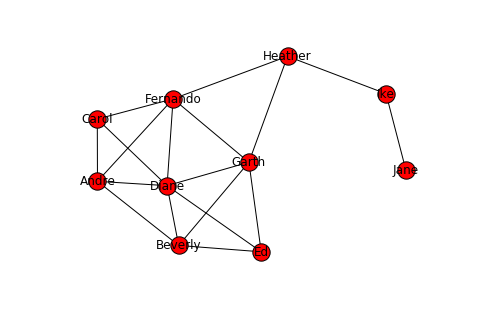

In [1]:
import networkx as net
import matplotlib.pyplot as plot
%matplotlib inline
#Generate the requested graph from scratch
g = net.Graph()
g.add_edges_from([("Beverly","Andre"),("Beverly","Ed"),("Beverly","Diane"),("Beverly","Garth")])
g.add_edges_from([("Andre","Carol"),("Andre","Fernando"),("Andre","Diane")])
g.add_edges_from([("Ed","Diane"),("Ed","Garth")])
g.add_edges_from([("Diane","Carol"),("Diane","Fernando"),("Diane","Garth")])
g.add_edges_from([("Carol","Fernando")])
g.add_edges_from([("Garth","Fernando"),("Garth","Heather")])
g.add_edges_from([("Fernando","Heather")])
g.add_edges_from([("Heather","Ike")])
g.add_edges_from([("Ike","Jane")])
net.draw(g, pos=net.spring_layout(g), labels={"Beverly":"Beverly","Andre":"Andre",
                                              "Ed":"Ed","Garth":"Garth","Carol":"Carol",
                                             "Fernando":"Fernando","Diane":"Diane","Heather":"Heather",
                                             "Ike":"Ike","Jane":"Jane"})
plot.axis('off')
plot.show()

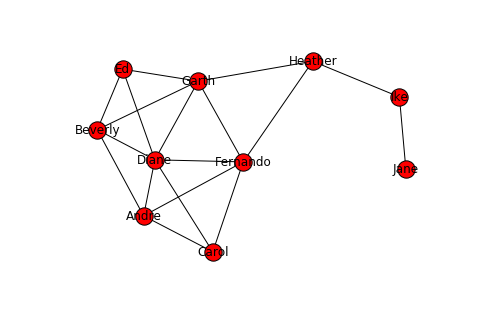

In [2]:
#Generate the requested graph from a krackhardt generator
gg = net.generators.small.krackhardt_kite_graph()
net.draw(gg, labels={0:"Andre", 1:"Beverly", 2:"Carol", 3:"Diane", 4:"Ed", 5:"Fernando", 
                     6:"Garth", 7:"Heather", 8:"Ike", 9:"Jane"})
plot.show()

In [3]:
#Bonus Points.  Generate graph using NHL Data
#NHL Captains - http://www.hockey-reference.com/leagues/NHL_2017_captains.html
import csv

data = open('NHLCaptainList.csv', 'rb')
file = csv.reader(data, delimiter=',')
header = file.next()
#NHL organized by Teams and Captains
NHLTeams = net.Graph()
NHLTeams.add_node("NHL")

In [4]:
label = {"NHL":"NHL"}
playerlabel = {}
for team, player, age, position, birthplace, nationality, notes in file:
    NHLTeams.add_edges_from([("NHL",team)])
    label[team] = team
    if not player:
        player = "Vacant"
    NHLTeams.add_edges_from([(team,player)])
    label[player] = player

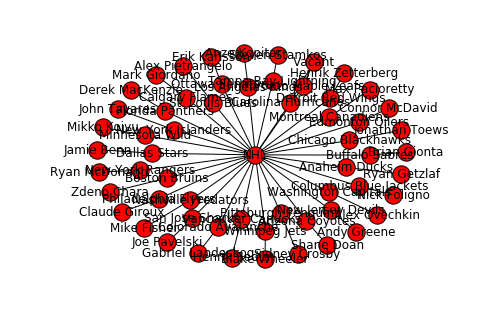

In [5]:
net.draw(NHLTeams, pos=net.spring_layout(NHLTeams), labels=label)
plot.show()

In [6]:
#NHL Captains organized by nationality
data.seek(0)
header = file.next()
labelnationality = {}
NHLNationality = net.Graph()
for team, player, age, position, birthplace, nationality, notes in file:
    if player:
        NHLNationality.add_node(nationality)
        labelnationality[nationality] = nationality
data.seek(0)
for team, player, age, position, birthplace, nationality, notes in file:
    if player:
        NHLNationality.add_edges_from([(nationality, player)])
        labelnationality[player] = player

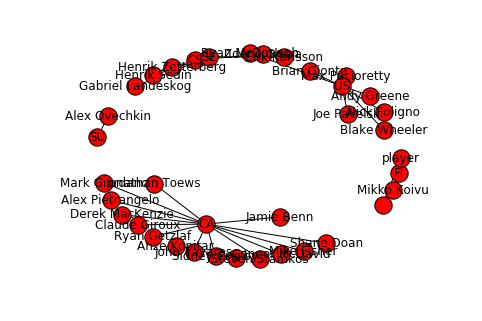

In [7]:
net.draw(NHLNationality, pos=net.spring_layout(NHLNationality), labels=labelnationality)
plot.show()

In [10]:
#Remake graph in GraphLab

from graphlab import SGraph, Vertex, Edge, canvas
canvas.set_target('ipynb')
NHLN = SGraph()
data.seek(0)
header = file.next()
verts = []
nationlist = []
for team, player, age, position, birthplace, nationality, notes in file:
    if player:
        verts.append(Vertex(nationality))
        nationlist.append(nationality)
        verts.append(Vertex(player))
NHLN = NHLN.add_vertices(verts)
data.seek(0)
header = file.next()
for team, player, age, position, birthplace, nationality, notes in file:
    if player:
        NHLN = NHLN.add_edges(Edge(nationality, player))

In [11]:
NHLN.show(vlabel="id", highlight=nationlist)